In [129]:
# ALY6080
# Author - Varun
# Question 3 -Clustering

In [ ]:
# Packages Section
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [130]:
# Reading Input file
my_data = pd.read_csv("D:/MS DATA ANALYTICS/Quarter 3/ALY 6080/20220413_Northeastern_AwanTunai_Capstone_Data (1).csv")
print(my_data)

            id  order_id  merchant_id  sku_id        date  top_cat_id  \
0       654713     82186         1754     981  2021-06-29         7.0   
1       654712     82186         1754   23060  2021-06-29         7.0   
2       654711     82186         1754    1548  2021-06-29         7.0   
3       654714     82186         1754    1969  2021-06-29         7.0   
4       654687     82186         1754     343  2021-06-29         7.0   
...        ...       ...          ...     ...         ...         ...   
18550  1854562    226313         1519    2063  2021-12-21         NaN   
18551  1854564    226313         1519    2012  2021-12-21         NaN   
18552  1831922    226313         1519     688  2021-12-21         NaN   
18553  1831645    226313         1519   15333  2021-12-21         NaN   
18554  1832087    226313         1519    5062  2021-12-21         NaN   

       sub_cat_id     price  
0            44.0  877000.0  
1            44.0  877000.0  
2            44.0  877000.0  
3  

In [131]:
# Dataset summary
my_data.info()
# Data Cleaning - Removing NA values
my_data = my_data.dropna()
print(my_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18555 entries, 0 to 18554
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           18555 non-null  int64  
 1   order_id     18555 non-null  int64  
 2   merchant_id  18555 non-null  int64  
 3   sku_id       18555 non-null  int64  
 4   date         18555 non-null  object 
 5   top_cat_id   16347 non-null  float64
 6   sub_cat_id   16347 non-null  float64
 7   price        18555 non-null  float64
dtypes: float64(3), int64(4), object(1)
memory usage: 1.1+ MB
            id  order_id  merchant_id  sku_id        date  top_cat_id  \
0       654713     82186         1754     981  2021-06-29         7.0   
1       654712     82186         1754   23060  2021-06-29         7.0   
2       654711     82186         1754    1548  2021-06-29         7.0   
3       654714     82186         1754    1969  2021-06-29         7.0   
4       654687     82186         1754     343

<AxesSubplot:>

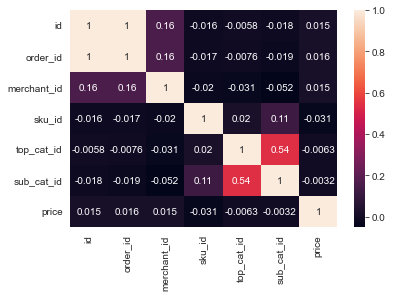

In [132]:
# EDA of the dataset
# Correlation Plot
corrs = my_data.corr()
sns.heatmap(corrs, annot=True)

In [133]:
# model 1 - number of orders placed by each merchant

model_1 = my_data.groupby('merchant_id', as_index=False).agg({"order_id": "count"})
model_1.rename(columns={'order_id': 'order_count'}, inplace=True)
print(model_1)

     merchant_id  order_count
0            875           32
1           1016            5
2           1041            8
3           1103           48
4           1156          249
..           ...          ...
490         2954           11
491         2973            8
492         3075            4
493         3104            1
494         3114            6

[495 rows x 2 columns]


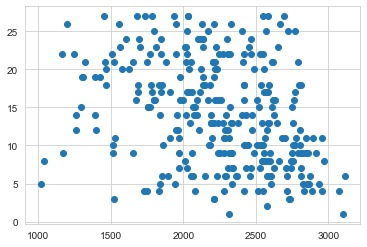

In [134]:
model_1 = model_1.sort_values('order_count')
model_1 = model_1.head(300)
plt.scatter(model_1['merchant_id'],model_1['order_count'])

<AxesSubplot:title={'center':'After Scaling'}, xlabel='order_count', ylabel='Density'>

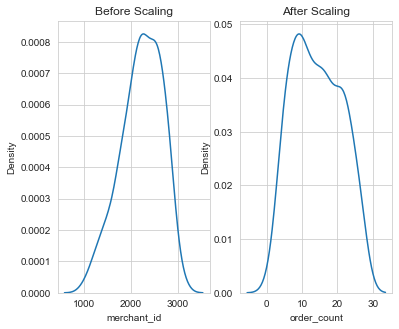

In [135]:
# Standardizing the values
#before standardizing
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(6, 5))

ax1.set_title('Before Scaling')
ax2.set_title('After Scaling')
sns.kdeplot(model_1['merchant_id'], ax=ax1)
sns.kdeplot(model_1['order_count'], ax=ax2)

In [136]:
# Scaling - Transformation

col_names = model_1.columns
features = model_1[col_names]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled = pd.DataFrame(features, columns = col_names)
scaled.head()

,merchant_id,order_count
0,0.183218,-1.930303
1,1.992143,-1.930303
2,0.793816,-1.784436
3,-0.045471,-1.638569
4,-1.632568,-1.638569


<AxesSubplot:xlabel='order_count', ylabel='Density'>

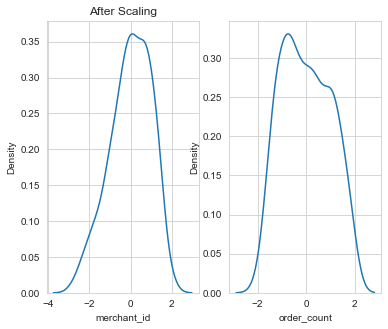

In [137]:
#after transforming
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(6, 5))
ax1.set_title('After Scaling')
sns.kdeplot(scaled['merchant_id'], ax=ax1)
sns.kdeplot(scaled['order_count'], ax=ax2)

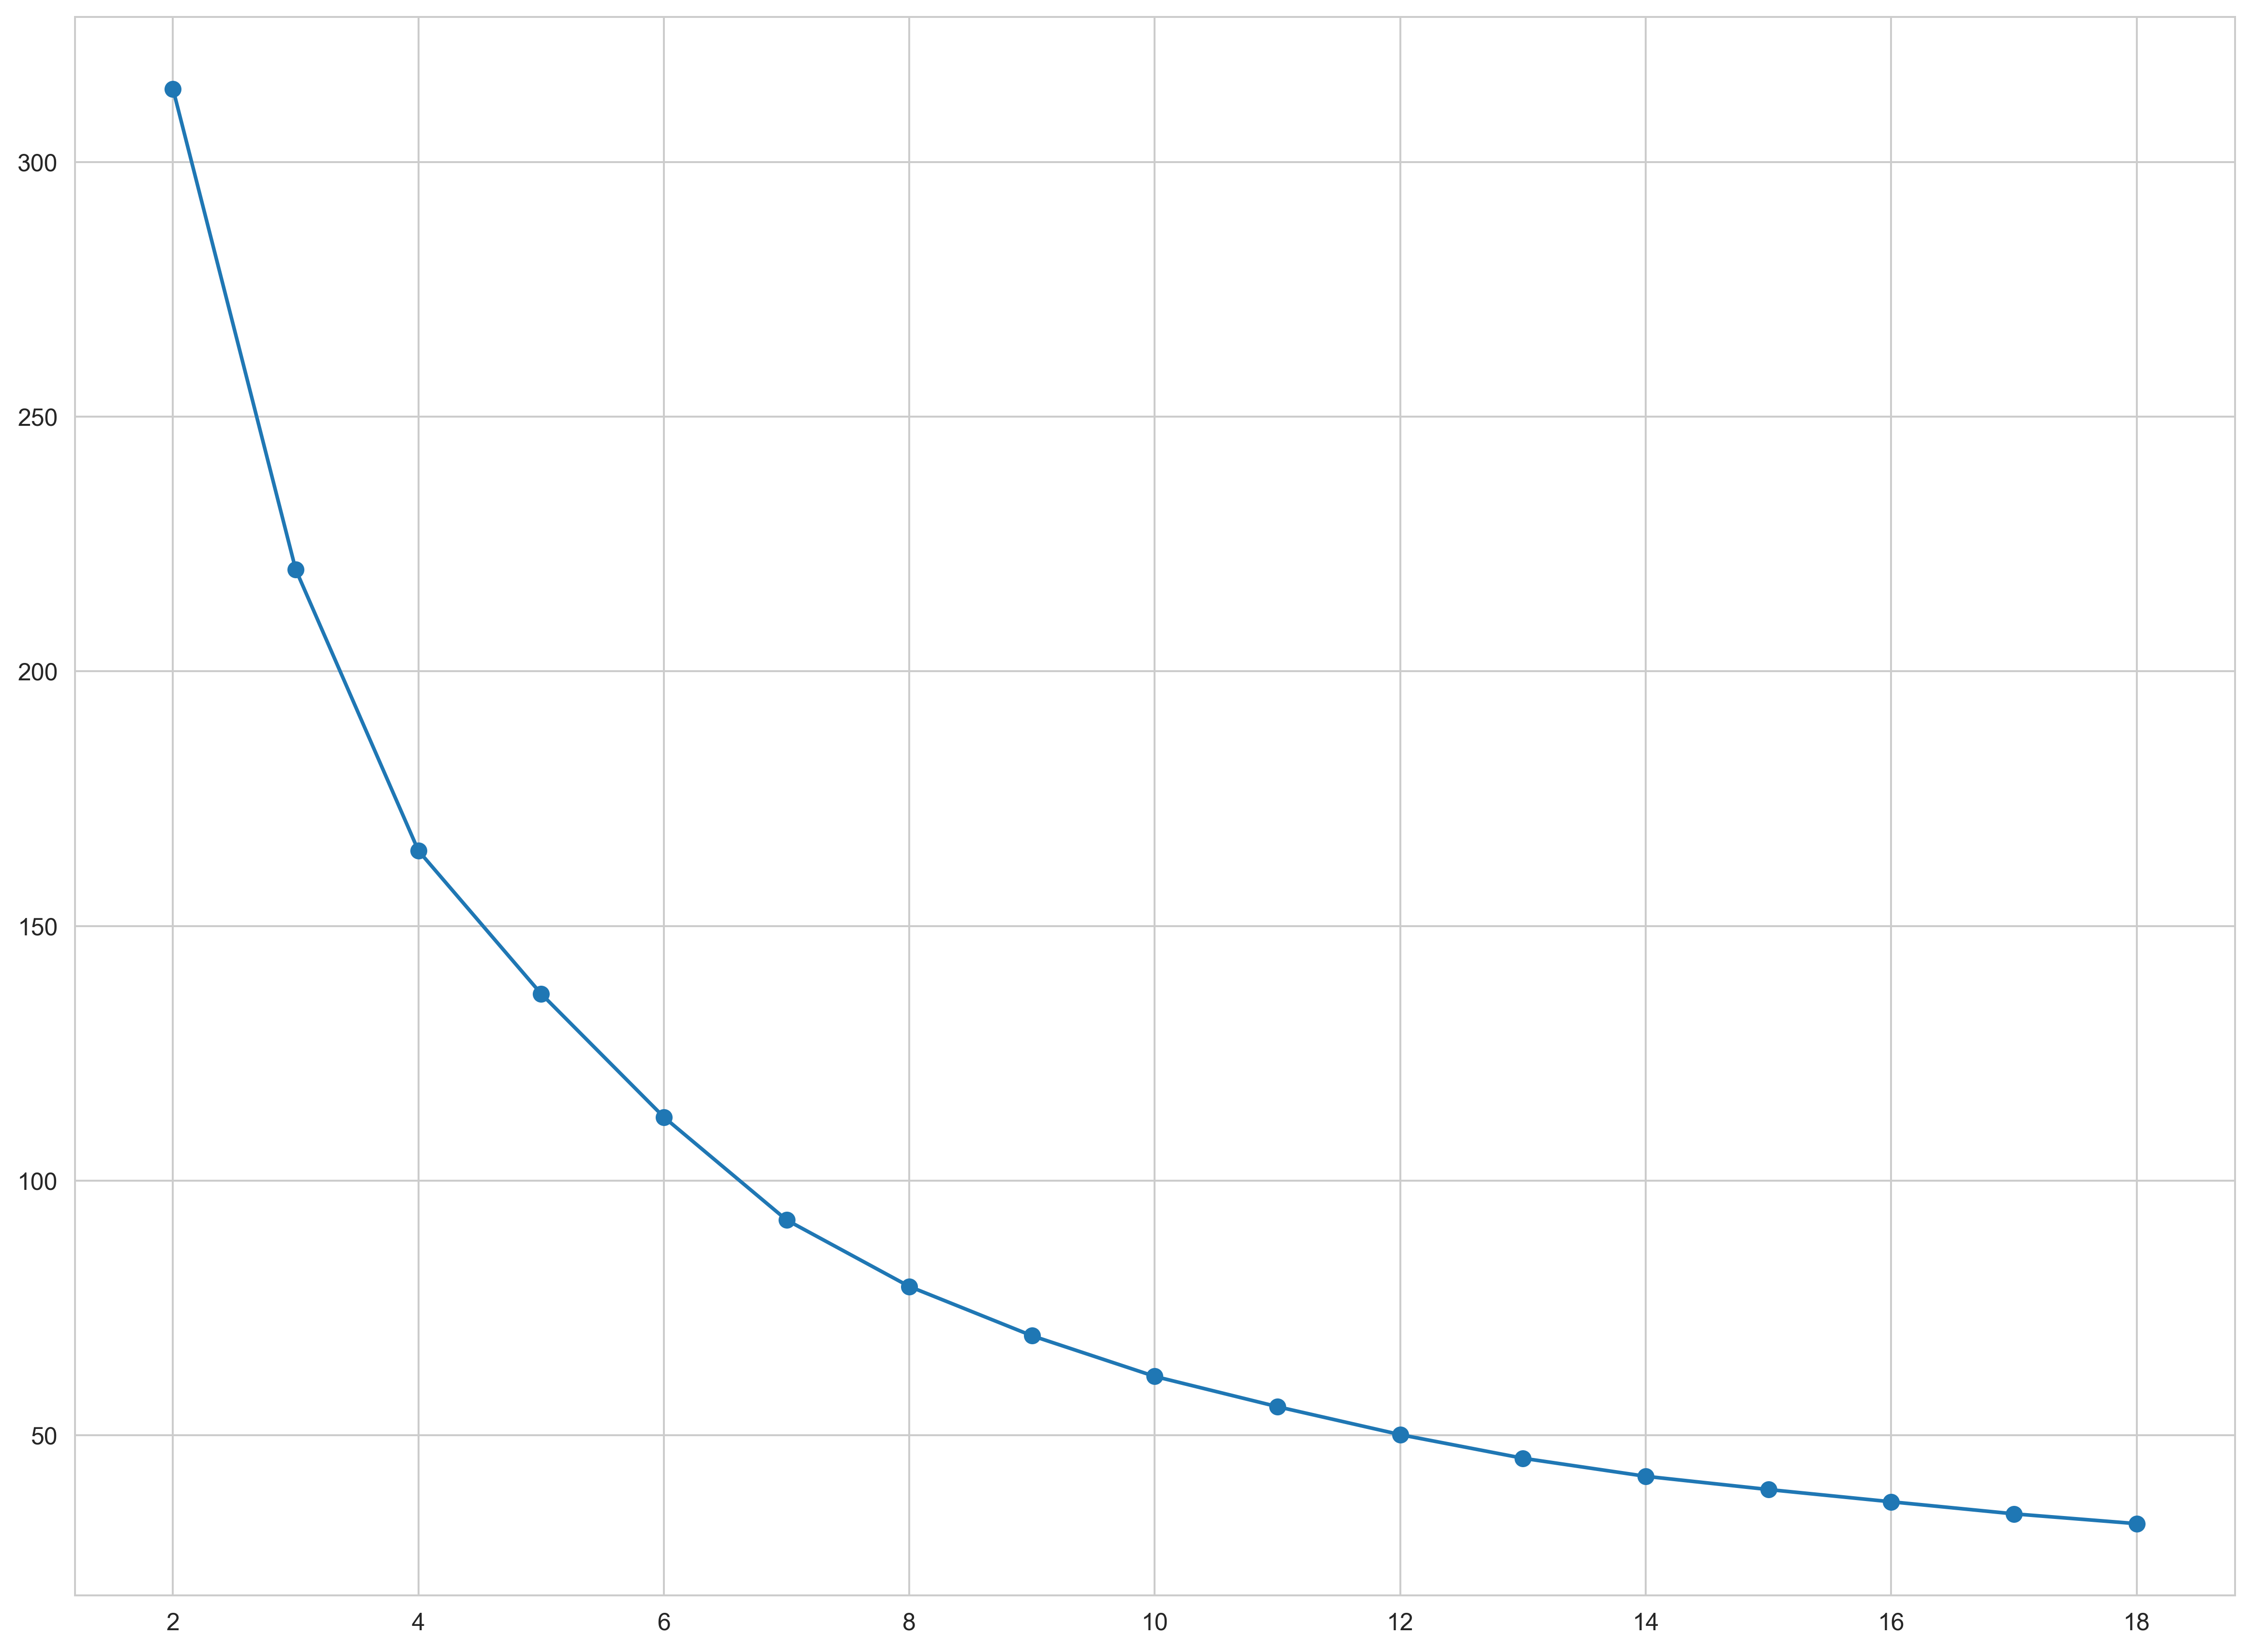

In [138]:
# Clustering with K means
from sklearn.cluster import KMeans

# Using Elbow method to test for best clusters
clusters_range=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
inertias=[]

for c in clusters_range:
    kmeans=KMeans(n_clusters=c, random_state=0).fit(scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(16, 12), dpi=360)
plt.plot(clusters_range,inertias, marker='o')

In [139]:
# k means clustering
km = KMeans(n_clusters=5)
y_predicted = km.fit_predict(scaled[['merchant_id','order_count']])
y_predicted

array([1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 1, 4, 1, 4, 1, 1, 1,
       4, 1, 1, 1, 1, 1, 4, 4, 1, 4, 1, 1, 4, 4, 1, 1, 1, 1, 1, 4, 4, 1,
       1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1,
       1, 4, 1, 1, 1, 1, 4, 1, 0, 1, 4, 0, 1, 0, 1, 0, 4, 4, 1, 1, 1, 0,
       1, 1, 4, 1, 0, 0, 0, 0, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1,
       4, 1, 4, 1, 0, 0, 4, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 4, 4, 4, 4,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 3, 0, 0, 3, 3, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 3, 0, 0, 3, 0, 3, 3,
       0, 0, 3, 0, 0, 0, 0, 3, 3, 0, 3, 0, 0, 3, 3, 2, 3, 3, 2, 3, 2, 3,
       3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 3, 3, 3, 2, 2,
       2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 3, 2, 3, 3, 3, 2, 2, 2, 2, 3,
       2, 3, 2, 2, 3, 2, 3, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 3, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 3])

In [140]:
model_1['cluster'] = y_predicted
model_1.head(10)

,merchant_id,order_count,cluster
343,2313,1,1
493,3104,1,1
421,2580,2,1
295,2213,3,1
74,1519,3,4
452,2730,3,1
453,2738,3,1
293,2211,3,1
489,2953,4,1
367,2415,4,1


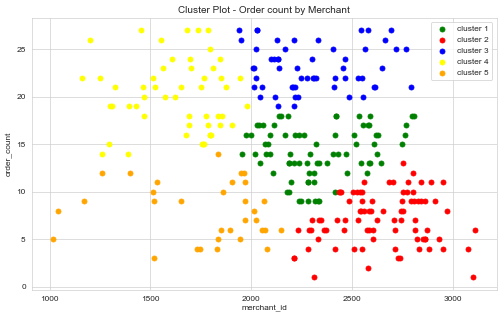

In [141]:
import matplotlib

scaled1 = model_1[model_1.cluster==0]
scaled2 = model_1[model_1.cluster==1]
scaled3 = model_1[model_1.cluster==2]
scaled4 = model_1[model_1.cluster==3]
scaled5 = model_1[model_1.cluster==4]
#scaled6 = scaled[scaled.cluster==5]
# scatter plot
plt.figure(figsize=(10, 6), dpi=60)
plt.scatter(scaled1.merchant_id,scaled1['order_count'],color='green',label='cluster 1')
plt.scatter(scaled2.merchant_id,scaled2['order_count'],color='red',label='cluster 2')
plt.scatter(scaled3.merchant_id,scaled3['order_count'],color='blue',label='cluster 3')
plt.scatter(scaled4.merchant_id,scaled4['order_count'],color='yellow',label='cluster 4')
plt.scatter(scaled5.merchant_id,scaled5['order_count'],color='orange',label='cluster 5')
#plt.scatter(scaled6.merchant_id,scaled6['order_count'],color='pink',label='cluster 6')
plt.legend()
#plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.title('Cluster Plot - Order count by Merchant')
plt.xlabel('merchant_id')
plt.ylabel('order_count')
plt.show()


In [142]:
#Interpretation
for i in range(5):
    average_order_count = model_1[model_1.cluster == i].order_count.count()
    print(" for cluster {} average order count is {}. ".format(i+1, average_order_count))

 for cluster 1 average order count is 76. 
 for cluster 2 average order count is 84. 
 for cluster 3 average order count is 56. 
 for cluster 4 average order count is 52. 
 for cluster 5 average order count is 32. 


In [143]:
# Model 2 - average price by merchant

model_2 = my_data.groupby('merchant_id', as_index=False).agg({"price": "mean"})
model_2.rename(columns={'price': 'mean_price'}, inplace=True)
model_2 = model_2.sort_values('mean_price')
model_2 = model_2.head(300)
model_2.head(25)
#plt.scatter(model_2['merchant_id'],model_2['mean_price'])

,merchant_id,mean_price
351,2335,0.000000
483,2864,0.000000
378,2445,13350.000000
421,2580,18250.000000
481,2861,21600.000000
295,2213,27916.666667
358,2362,30233.333333
374,2433,30520.238095
203,1955,30673.611111
352,2336,32928.571429


<AxesSubplot:xlabel='mean_price', ylabel='Density'>

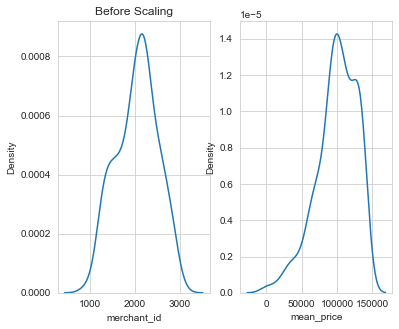

In [144]:
# Standardizing the values
#before standardizing
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(model_2['merchant_id'], ax=ax1)
sns.kdeplot(model_2['mean_price'], ax=ax2)

In [145]:
# Scaling - Transformation

col_names = model_2.columns
features2 = model_2[col_names]

from sklearn.preprocessing import StandardScaler

scaler2 = StandardScaler().fit(features2.values)
features2 = scaler.transform(features2.values)
scaled2 = pd.DataFrame(features2, columns = col_names)
scaled2.head()

,merchant_id,mean_price
0,0.233529,-2.076170
1,1.443291,-2.076170
2,0.485086,1945.244485
3,0.793816,2659.991392
4,1.436430,3148.644890


<AxesSubplot:xlabel='mean_price', ylabel='Density'>

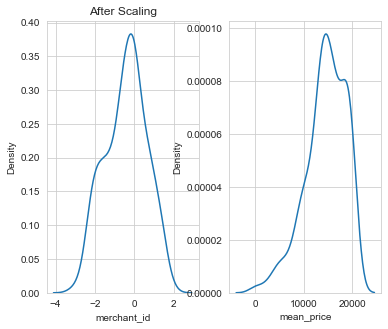

In [146]:
#after transforming
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(6, 5))
ax1.set_title('After Scaling')
sns.kdeplot(scaled2['merchant_id'], ax=ax1)
sns.kdeplot(scaled2['mean_price'], ax=ax2)

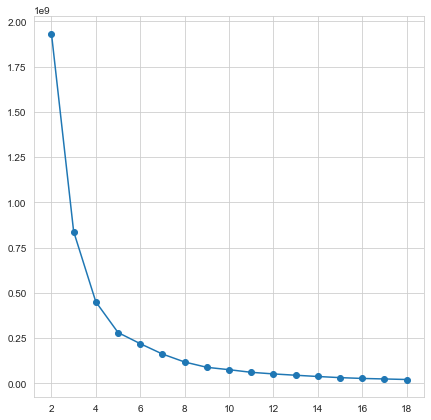

In [147]:
# Clustering with K means
from sklearn.cluster import KMeans

# Using Elbow method to test for best clusters
clusters_range=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
inertias=[]

for c in clusters_range:
    kmeans=KMeans(n_clusters=c, random_state=0).fit(scaled2)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(7,7))
plt.plot(clusters_range,inertias, marker='o')

In [148]:
# k means clustering
km = KMeans(n_clusters=5)
y_predicted2 = km.fit_predict(scaled2[['merchant_id','mean_price']])
y_predicted2
model_2['cluster'] = y_predicted2
model_2.head(9)

,merchant_id,mean_price,cluster
351,2335,0.000000,2
483,2864,0.000000,2
378,2445,13350.000000,2
421,2580,18250.000000,2
481,2861,21600.000000,2
295,2213,27916.666667,2
358,2362,30233.333333,2
374,2433,30520.238095,2
203,1955,30673.611111,2


Text(0.5, 1.0, 'Average Purchase Price per Merchant')

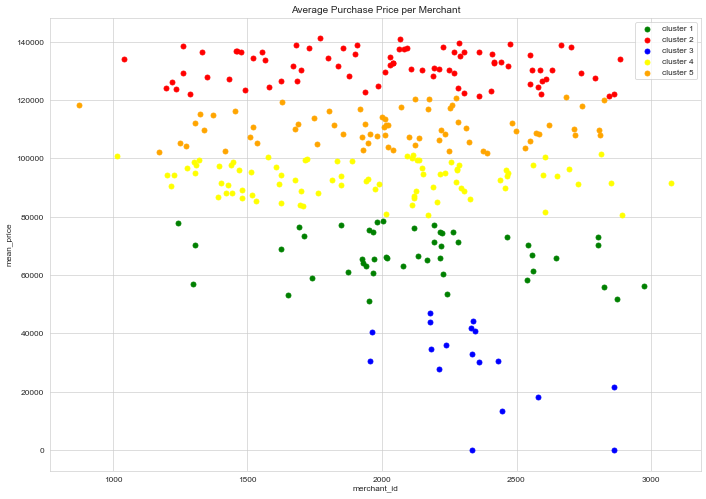

In [149]:
# cluster plot
scaled21 = model_2[model_2.cluster==0]
scaled22 = model_2[model_2.cluster==1]
scaled23 = model_2[model_2.cluster==2]
scaled24 = model_2[model_2.cluster==3]
scaled25 = model_2[model_2.cluster==4]

# scatter plot
plt.figure(figsize=(14, 10), dpi=60)
plt.scatter(scaled21.merchant_id,scaled21['mean_price'],color='green',label='cluster 1')
plt.scatter(scaled22.merchant_id,scaled22['mean_price'],color='red',label='cluster 2')
plt.scatter(scaled23.merchant_id,scaled23['mean_price'],color='blue',label='cluster 3')
plt.scatter(scaled24.merchant_id,scaled24['mean_price'],color='yellow',label='cluster 4')
plt.scatter(scaled25.merchant_id,scaled25['mean_price'],color='orange',label='cluster 5')
#plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('merchant_id')
plt.ylabel('mean_price')
plt.legend()
plt.title('Average Purchase Price per Merchant')

In [150]:
# model 3 - quarterly order count

df = my_data
df['date'] = pd.to_datetime(df['date'])
df["Quarter"] = df.date.dt.quarter

df1 = df[df['Quarter'] == 1]
df2 = df[df['Quarter'] == 2]
df3 = df[df['Quarter'] == 3]
df4 = df[df['Quarter'] == 4]

In [151]:
df_1 = df1.groupby('merchant_id', as_index=False).agg({"order_id": "count"})
df_1.rename(columns={'order_id': 'order_count'}, inplace=True)
df_2 = df2.groupby('merchant_id', as_index=False).agg({"order_id": "count"})
df_2.rename(columns={'order_id': 'order_count'}, inplace=True)
df_3 = df3.groupby('merchant_id', as_index=False).agg({"order_id": "count"})
df_3.rename(columns={'order_id': 'order_count'}, inplace=True)
df_4 = df4.groupby('merchant_id', as_index=False).agg({"order_id": "count"})
df_4.rename(columns={'order_id': 'order_count'}, inplace=True)
df_4

,merchant_id,order_count
0,875,32
1,1016,5
2,1041,8
3,1103,48
4,1156,55
...,...,...
482,2954,11
483,2973,8
484,3075,4
485,3104,1


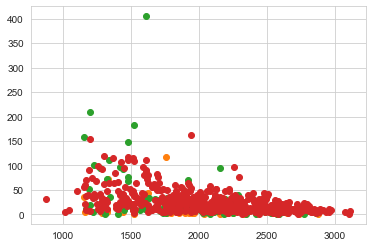

In [152]:
plt.scatter(df_1['merchant_id'],df_1['order_count'])
plt.scatter(df_2['merchant_id'],df_2['order_count'])
plt.scatter(df_3['merchant_id'],df_3['order_count'])
plt.scatter(df_4['merchant_id'],df_4['order_count'])

In [153]:
# Model X - Total purchase by merchant on quarterly basis
df
model_x = df.groupby(['Quarter','merchant_id'], as_index=False).agg({"price": "sum"})

model_x = model_x.sort_values('price')
model_x = model_x.head(300)
model_x = model_x[model_x['price'] != 0]

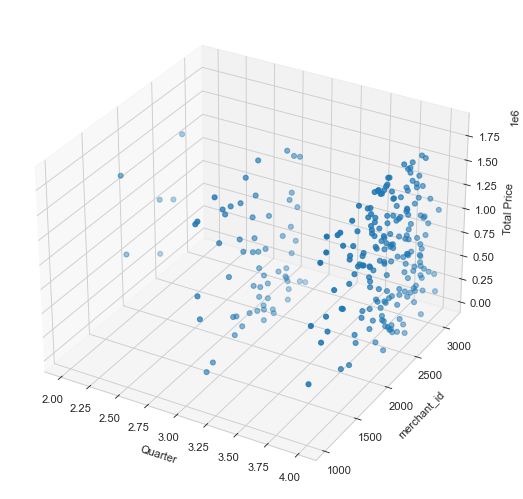

In [154]:
from matplotlib.pyplot import figure


# Fixing random state for reproducibility
np.random.seed(123)


fig = plt.figure(figsize=(12, 8), dpi=80)
ax = fig.add_subplot(projection='3d')
xs = model_x['Quarter']
ys = model_x['merchant_id']
zs = model_x['price']
ax.scatter(xs, ys, zs)
ax.set_xlabel('Quarter')
ax.set_ylabel('merchant_id')
ax.set_zlabel('Total Price')

plt.show()

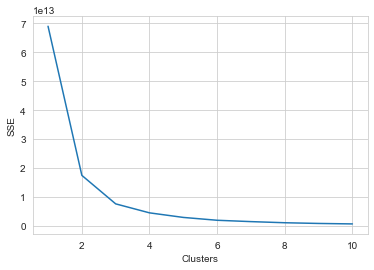

In [155]:
#elbow method
wcss = []
for i in range(1,11):
    k_means = KMeans(n_clusters=i,init='k-means++', random_state=42)
    k_means.fit(model_x)
    wcss.append(k_means.inertia_)
#plot elbow curve
plt.plot(np.arange(1,11),wcss)
plt.xlabel('Clusters')
plt.ylabel('SSE')
plt.show()

In [156]:
k_means_optimum = KMeans(n_clusters = 3, init = 'k-means++',  random_state=42)
y = k_means_optimum.fit_predict(model_x)
print(y)
model_x['cluster'] = y
model_x.head(6)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


,Quarter,merchant_id,price,cluster
135,3,2346,19000.0,2
145,3,2574,26500.0,2
576,4,2580,36500.0,2
123,3,2187,41500.0,2
159,3,2861,43750.0,2
73,3,1306,46000.0,2


AttributeError: module 'matplotlib.pyplot' has no attribute 'zlabel'

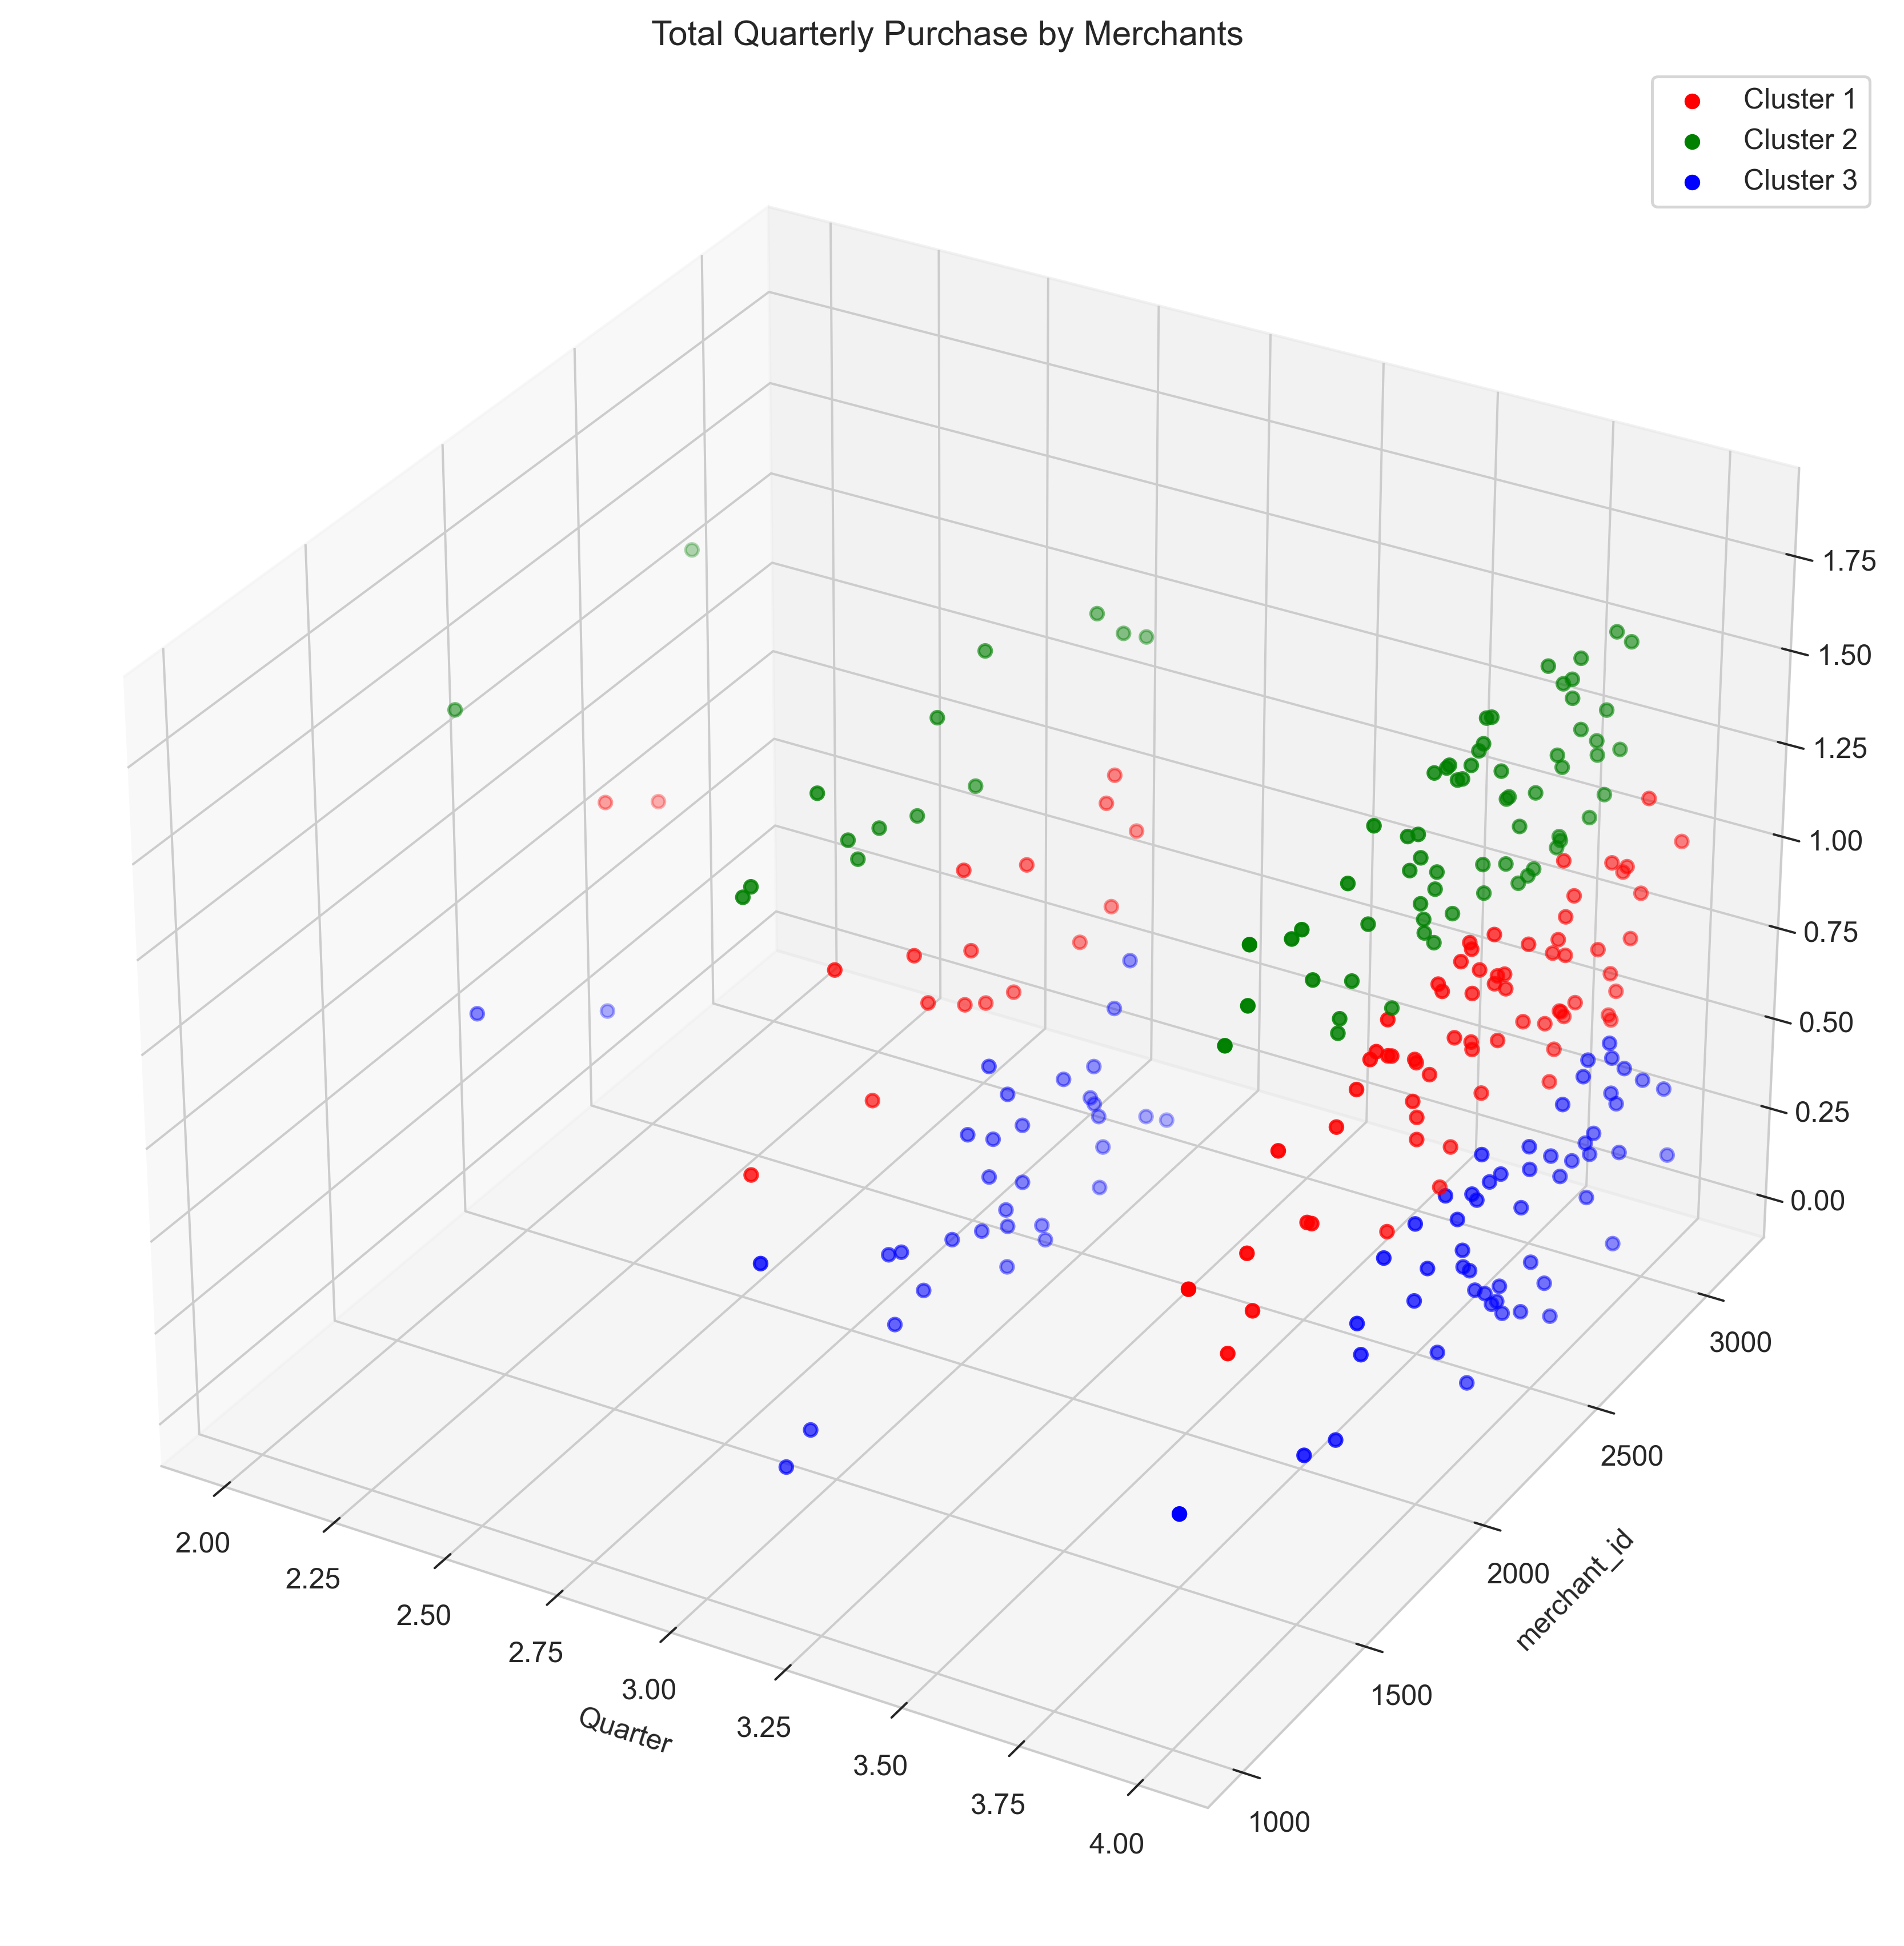

In [157]:
data1 = model_x[model_x.cluster==0]
data2 = model_x[model_x.cluster==1]
data3 = model_x[model_x.cluster==2]


kplot = plt.figure(figsize=(16, 12), dpi=360)
kplot = plt.axes(projection='3d')
kplot.scatter3D(data1.Quarter, data1.merchant_id, data1.price, c='red', label = 'Cluster 1')
kplot.scatter3D(data2.Quarter, data2.merchant_id, data2.price, c='green', label = 'Cluster 2')
kplot.scatter3D(data3.Quarter, data3.merchant_id, data3.price, c='blue', label = 'Cluster 3')
#kplot.scatter(k_means_optimum.cluster_centers_[:,0], k_means_optimum.cluster_centers_[:,1], k_means_optimum.cluster_centers_[:,2], color = 'purple', s = 200)
kplot.legend()
plt.title("Total Quarterly Purchase by Merchants ")
plt.xlabel('Quarter')
plt.ylabel('merchant_id')
plt.zlabel('Total Price')
plt.show()



     sku_id   Avg_diff
0         0   7.812500
1         1   4.750000
2         2   4.068966
3         3   3.051282
4         4   3.169014
..      ...        ...
709   23746   2.777778
710   23747   8.000000
711   23748   7.307692
712   23749   4.512195
713   23756  19.666667

[714 rows x 2 columns]


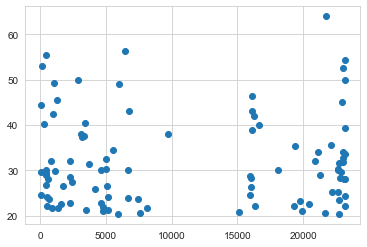

In [158]:
# Reading Input file
model_1x = pd.read_csv("D:/MS DATA ANALYTICS/Quarter 3/ALY 6080/Week 6/datafiles/sku_movement.csv")
print(model_1x)

# model - sales by sku speed
model_1x = model_1x.sort_values('Avg_diff')
model_1x = model_1x.tail(100)
plt.scatter(model_1x['sku_id'],model_1x['Avg_diff'])

<AxesSubplot:xlabel='Avg_diff', ylabel='Density'>

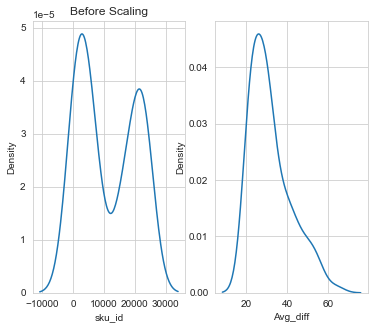

In [159]:
# Standardizing the values
#before standardizing
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(model_1x['sku_id'], ax=ax1)
sns.kdeplot(model_1x['Avg_diff'], ax=ax2)

In [160]:
# Scaling - Transformation

col_names = model_1x.columns
features = model_1x[col_names]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled = pd.DataFrame(features, columns=col_names)
scaled.head()

,sku_id,Avg_diff
0,-0.558843,-1.162827
1,1.291347,-1.158327
2,1.172442,-1.152701
3,-0.373329,-1.152701
4,0.455266,-1.124575


<AxesSubplot:xlabel='Avg_diff', ylabel='Density'>

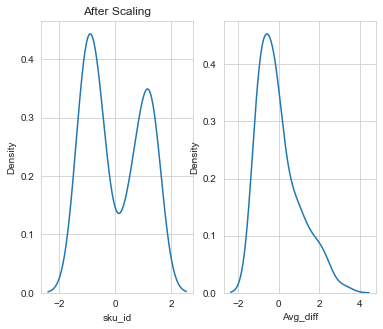

In [161]:
#after transforming
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(6, 5))
ax1.set_title('After Scaling')
sns.kdeplot(scaled['sku_id'], ax=ax1)
sns.kdeplot(scaled['Avg_diff'], ax=ax2)

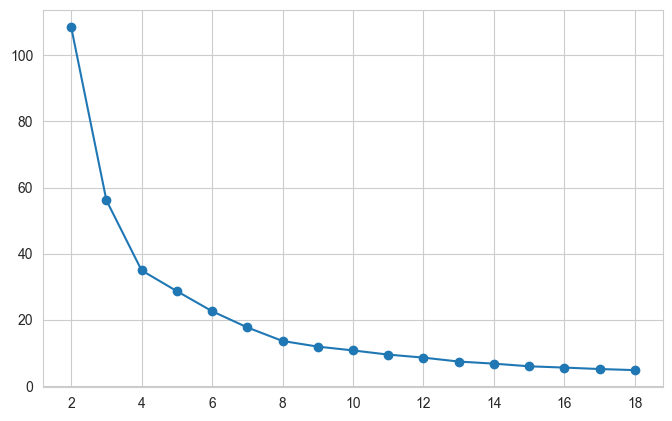

In [162]:
# Clustering with K means
from sklearn.cluster import KMeans

# Using Elbow method to test for best clusters
clusters_range=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
inertias=[]

for c in clusters_range:
    kmeans=KMeans(n_clusters=c, random_state=0).fit(scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5), dpi=100)
plt.plot(clusters_range,inertias, marker='o')

In [163]:
# k means clustering
km = KMeans(n_clusters=5)
y_predicted = km.fit_predict(scaled[['sku_id','Avg_diff']])
y_predicted

array([2, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 2, 2, 4,
       4, 2, 2, 2, 2, 2, 4, 4, 2, 4, 4, 2, 4, 2, 2, 2, 2, 2, 1, 1, 4, 1,
       2, 4, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 3, 0, 3, 0, 0, 3,
       0, 3, 0, 0, 0, 3, 3, 0, 3, 0, 0, 3])

In [164]:
model_1x['cluster'] = y_predicted
model_1x.head(6)
model_1x = model_1x.sort_values('Avg_diff')
model_1x

,sku_id,Avg_diff,cluster
393,5930,20.400000,2
648,22735,20.444444,4
607,21655,20.500000,4
431,7615,20.500000,2
494,15141,20.777778,4
...,...,...,...
39,143,53.000000,0
686,23166,54.333333,3
81,404,55.500000,0
403,6420,56.333333,0


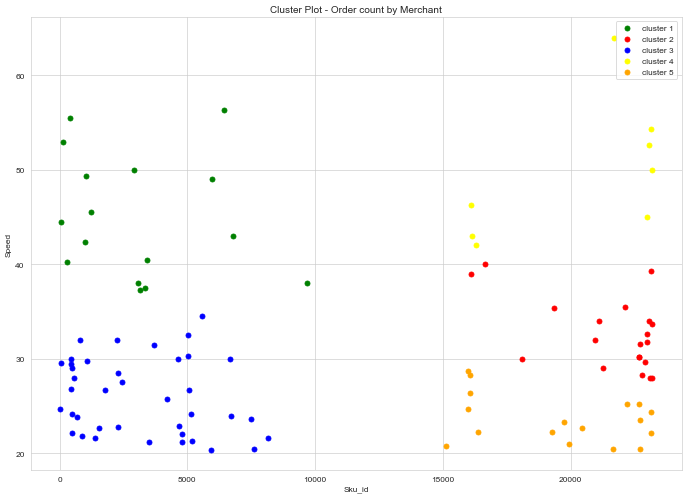

In [165]:
import matplotlib

scaled1 = model_1x[model_1x.cluster==0]
scaled2 = model_1x[model_1x.cluster==1]
scaled3 = model_1x[model_1x.cluster==2]
scaled4 = model_1x[model_1x.cluster==3]
scaled5 = model_1x[model_1x.cluster==4]

# scatter plot
plt.figure(figsize=(14, 10), dpi=60)
plt.scatter(scaled1.sku_id,scaled1['Avg_diff'],color='green',label='cluster 1')
plt.scatter(scaled2.sku_id,scaled2['Avg_diff'],color='red',label='cluster 2')
plt.scatter(scaled3.sku_id,scaled3['Avg_diff'],color='blue',label='cluster 3')
plt.scatter(scaled4.sku_id,scaled4['Avg_diff'],color='yellow',label='cluster 4')
plt.scatter(scaled5.sku_id,scaled5['Avg_diff'],color='orange',label='cluster 5')

plt.legend()
#plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.title('Cluster Plot - Order count by Merchant')
plt.xlabel('Sku_id')
plt.ylabel('Speed')
plt.show()